In [1]:
#importing libraries
from pandas import read_csv
from numpy import mean
from numpy import std
from numpy import delete
from numpy import savetxt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Dataset observation

In [2]:
# load the dataset.
column_list = ['AF3','F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4','class']
feat_list = ['AF3','F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4']
df = pd.read_csv('eyedata.csv',header=None)
df.columns=column_list
values = df.values

In [3]:
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,class
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [4]:
df.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,class
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832,0.448798
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043,0.497388
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000,0.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,0.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,0.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,1.000000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AF3     14980 non-null  float64
 1   F7      14980 non-null  float64
 2   F3      14980 non-null  float64
 3   FC5     14980 non-null  float64
 4   T7      14980 non-null  float64
 5   P7      14980 non-null  float64
 6   O1      14980 non-null  float64
 7   O2      14980 non-null  float64
 8   P8      14980 non-null  float64
 9   T8      14980 non-null  float64
 10  FC6     14980 non-null  float64
 11  F4      14980 non-null  float64
 12  F8      14980 non-null  float64
 13  AF4     14980 non-null  float64
 14  class   14980 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.7 MB


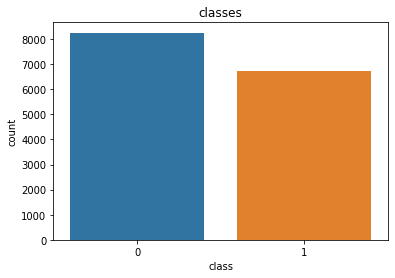

In [6]:
sns.countplot(df['class'],label="Count")
plt.title('classes')
plt.savefig('co1.png')

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


ndf=(df-df.min())/(df.max()-df.min())
ndf['class'] = df['class']

bestfeatures = SelectKBest(score_func=chi2, k=10)
X = ndf.iloc[:,:-1]  #independent columns
y = ndf.iloc[:,-1]
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat 3 dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
feature_select = featureScores.nlargest(30,'Score')
print(feature_select)  #print 30 best features

   Specs         Score
7     O2  6.142776e-02
1     F7  3.449933e-02
10   FC6  2.680455e-02
3    FC5  2.109701e-02
6     O1  1.446304e-02
13   AF4  1.359500e-02
5     P7  1.168472e-02
0    AF3  1.002972e-02
8     P8  8.291615e-03
11    F4  6.201815e-03
12    F8  5.461861e-03
9     T8  4.121703e-03
2     F3  2.376285e-03
4     T7  2.488840e-07


In [13]:
values.shape

(14980, 15)

In [14]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

In [15]:
kmo_model

0.5996153445995714

In [16]:
data = df.values

In [17]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.fit(df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([4.09491022e+00, 3.34630395e+00, 2.74260986e+00, 2.63006749e+00,
       1.02331815e+00, 4.82173975e-01, 3.78323777e-01, 1.79771904e-01,
       6.44400203e-02, 4.13983046e-02, 1.64880472e-02, 1.49111804e-04,
       3.34956583e-05, 6.56415979e-06, 5.14464726e-06])

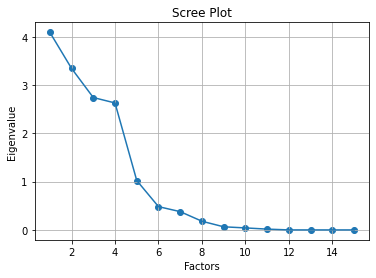

In [18]:
df1 = df
plt.figure()
plt.scatter(range(1,df1.shape[1]+1),ev)
plt.plot(range(1,df1.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.savefig('scree.png')
plt.show()

In [19]:
fa = FactorAnalyzer(n_factors = 5,rotation = "varimax")
fa.fit(df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=5, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [20]:
df100=pd.DataFrame(fa.loadings_, columns=['f1','f2','f3','f4','f5']) 

In [21]:
df100

,f1,f2,f3,f4,f5
0,0.996476,0.011705,0.011538,0.022438,-0.011817
1,0.256169,-0.183285,-0.152378,0.719355,-0.243473
2,0.487503,-0.252404,-0.653864,0.415148,0.111991
3,-0.003223,0.995049,0.085891,-0.019559,-0.019146
4,0.292877,0.465169,0.450923,-0.180860,0.216857
5,-0.003789,-0.067804,0.990862,0.100541,-0.034609
6,-0.009046,0.994655,0.090538,-0.017731,-0.017971
7,0.011871,0.124246,0.145324,0.836521,0.095923
8,0.994096,0.013729,-0.008659,0.028535,-0.014723
9,-0.085472,-0.535360,0.328290,0.730045,0.203561


In [22]:
df101=pd.DataFrame(fa.get_factor_variance(), columns=['f1','f2','f3','f4','f5'],index=['ss loadings','prop var','cumm var']) 

In [23]:
df101

,f1,f2,f3,f4,f5
ss loadings,3.867122,3.131871,2.869865,2.589628,0.393130
prop var,0.257808,0.208791,0.191324,0.172642,0.026209
cumm var,0.257808,0.466600,0.657924,0.830566,0.856774


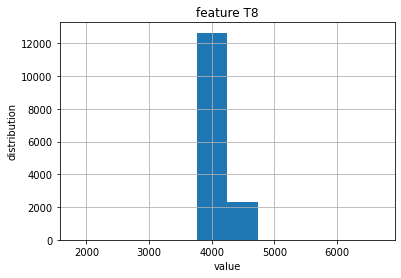

In [58]:
df['T8'].hist()
plt.xlabel('value')
plt.ylabel('distribution')
plt.title('feature T8')
plt.savefig('bh.png')

## outliers

In [24]:

for i in range(values.shape[1] - 1):
    
    print('column = %s'%column_list[i])
    
    data_mean, data_std = mean(values[:,i]), std(values[:,i])
    
    # define outlier bounds
    cut_off = data_std * 4
    lower, upper = data_mean - cut_off, data_mean + cut_off
    
    too_small = [j for j in range(values.shape[0]) if values[j,i] < lower]
    values = delete(values, too_small, 0)
    print('>deleted %d rows because of too small values' % len(too_small))
    
    too_large = [j for j in range(values.shape[0]) if values[j,i] > upper]
    values = delete(values, too_large, 0)
    print('>deleted %d rows because of too large values' % len(too_large))

column = AF3
>deleted 0 rows because of too small values
>deleted 1 rows because of too large values
column = F7
>deleted 2 rows because of too small values
>deleted 1 rows because of too large values
column = F3
>deleted 0 rows because of too small values
>deleted 142 rows because of too large values
column = FC5
>deleted 0 rows because of too small values
>deleted 48 rows because of too large values
column = T7
>deleted 0 rows because of too small values
>deleted 153 rows because of too large values
column = P7
>deleted 0 rows because of too small values
>deleted 43 rows because of too large values
column = O1
>deleted 0 rows because of too small values
>deleted 0 rows because of too large values
column = O2
>deleted 0 rows because of too small values
>deleted 15 rows because of too large values
column = P8
>deleted 0 rows because of too small values
>deleted 5 rows because of too large values
column = T8
>deleted 10 rows because of too small values
>deleted 0 rows because of too lar

In [25]:
values.shape

(14304, 15)

In [26]:
# save the results to a new file
savetxt('EEG_Eye_State_no_outliers.csv', values, delimiter=',')

In [27]:
column_list = ['AF3','F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4','class']
df2 = pd.read_csv('2outliers.csv')
df2.columns = column_list

In [28]:
df2.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,class
0,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0.0
1,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0.0
2,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0.0
3,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0.0
4,4321.03,4004.62,4284.10,4153.33,4345.64,4587.18,4093.33,4616.92,4202.56,4232.82,4209.74,4281.03,4628.21,4389.74,0.0


In [29]:
df2.shape

(14303, 15)

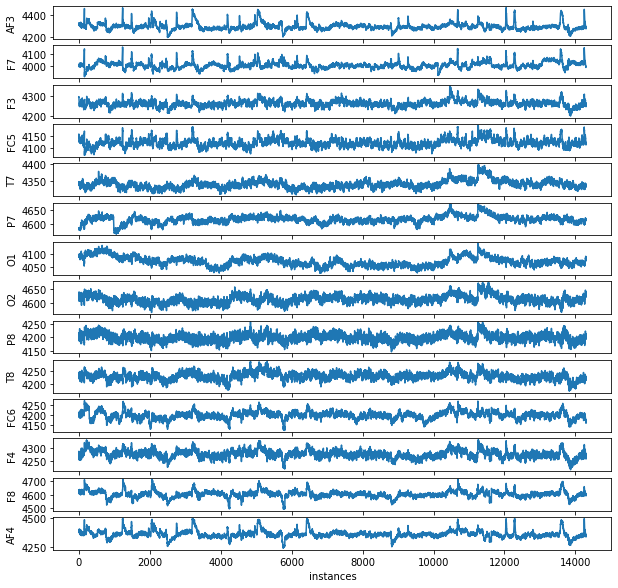

In [61]:
values = df2[feat_list].values
# create a subplot for each time series
plt.figure(figsize=(10,10))
for i in range(values.shape[1]):
    plt.subplot(values.shape[1], 1, i+1)
    plt.plot(values[:, i])
    plt.ylabel(feat_list[i])
plt.xlabel('instances')
plt.savefig('sensordata.png')
plt.show()

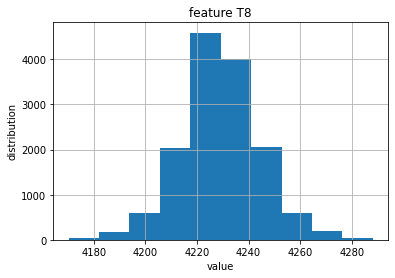

In [59]:
df2['T8'].hist()
plt.xlabel('value')
plt.ylabel('distribution')
plt.title('feature T8')
plt.savefig('ah.png')

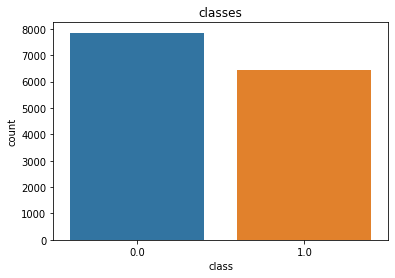

In [25]:
sns.countplot(df2['class'],label="Count")
plt.title('classes')
plt.savefig('co2.png')

## using Z-test

In [78]:
from scipy.stats import norm
import numpy as np
def qqplot(x):
    x.sort()
    n=len(x)
    rank = np.arange(1,n+1,1)
    line = (rank-0.5)/n
    
    zr = []
    for i in range(0,len(x)):
        t = norm.ppf(line[i])
        zr.append(t)

    z = np.multiply(zr,np.std(x)) + np.mean(x)

    plt.scatter(zr,x)
    plt.plot(zr,z,color='r',lw=2)
    plt.title('qq plot')
    plt.xlabel('theoretical quantiles')
    plt.ylabel('actual quantiles')
    plt.savefig('qq2.png')
    plt.show()

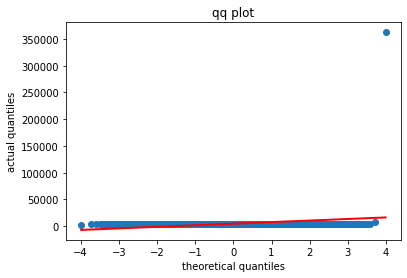

In [80]:
f = df[feat_list[4]].values.tolist()
qqplot(f)

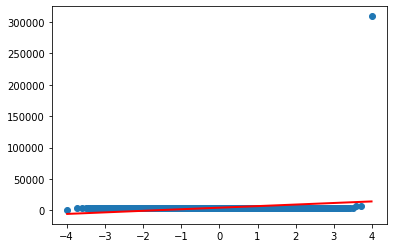

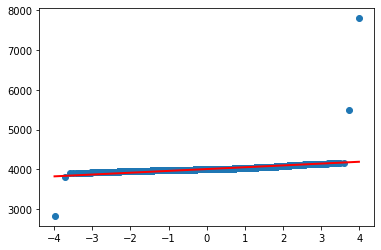

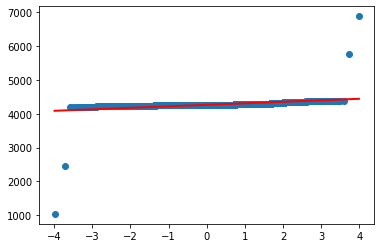

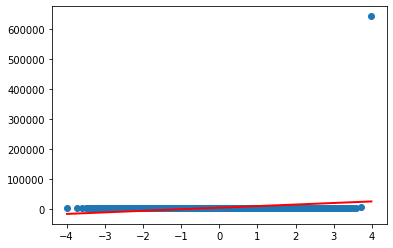

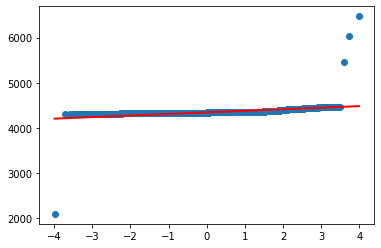

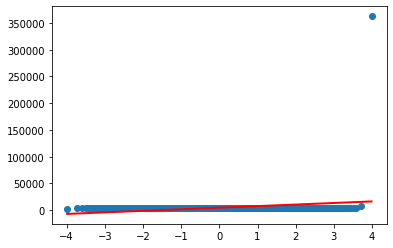

KeyboardInterrupt: 

In [66]:
# ALl features Q-Q plot
for i in range(0,14):
    f = df[feat_list[i]].values.tolist()
    qqplot(f)

In [30]:
z_scores = stats.zscore(df)
# print(z_scores)
threshold = 3
ext_df = df[(z_scores<3).all(axis=1)]

In [45]:
ext_df.shape

(14892, 15)

In [41]:
ext_df.to_csv('ftest.csv',index=0)

In [42]:
df3 = pd.read_csv('ftest.csv')
#df3.columns = column_list

In [43]:
df3.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,class
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [44]:
df3.shape

(14892, 15)

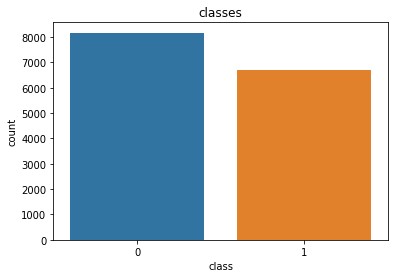

In [60]:
sns.countplot(df3['class'],label="Count")
plt.title('classes')
plt.savefig('co3.png')

## IQR

In [48]:
Q1 = df[column_list[0:-1]].quantile(0.25)
Q3 = df[column_list[0:-1]].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

AF3    31.28
F7     32.31
F3     20.51
FC5    24.10
T7     15.39
P7     14.88
O1     25.64
O2     19.48
P8     18.46
T8     18.98
FC6    21.02
F4     19.49
F8     26.67
AF4    30.77
dtype: float64


In [51]:
data_iqr = df[~((df < (Q1 - 3 * IQR)) |(df > (Q3 + 3 * IQR))).any(axis=1)]

In [52]:
data_iqr.shape

(13865, 15)

In [53]:
data_iqr.to_csv('iqr.csv',index=0)

In [54]:
df4 = pd.read_csv('iqr.csv')

In [55]:
df4.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,class
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [56]:
df4.shape

(13865, 15)

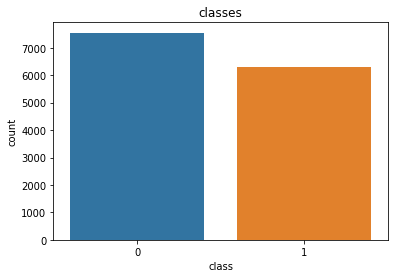

In [61]:
sns.countplot(df4['class'],label="Count")
plt.title('classes')
plt.savefig('co4.png')